Se han creado diferentes main para poder desarrolalr los diferentes modelos. 

In [3]:
import os, sys
import warnings               
warnings.filterwarnings('ignore')
from tensorflow import keras
import tensorflow as tf
import shutil
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import call

In [4]:
dir = os.path.dirname
path = dir(os.getcwd())
print(path)
sys.path.append(path)

d:\COSAS\BOOTCAMP\MLProyect


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from src.utils.folders_tb import *
from src.utils.models import *

d:\COSAS\BOOTCAMP\MLProyect


In [6]:
train_data = access_train2(180, 180, 32)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.


In [7]:
val_data = access_val2(180, 180, 32)

Found 2870 files belonging to 4 classes.
Using 574 files for validation.


In [8]:
test_data = access_test2(180, 180, 32)

Found 394 files belonging to 4 classes.


Debido a problemas técnicos con las funciones se han utilizado cuando ha sido posible importarlas

In [23]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=16,
                        kernel_size=(3, 3), 
                        input_shape=(180, 180, 3), 
                        padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), 
                              padding="same"),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(4, activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 90, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 129600)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16588928  
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 516       
Total params: 16,589,892
Trainable params: 16,589,892
Non-trainable params: 0
__________________________________________

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='adam',              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor="val_loss",patience=5, verbose=True)

In [25]:
history = model.fit(train_data,
                    validation_data = val_data,
                    callbacks=[early_stop],
                    epochs = 10,
                    verbose=1)

Epoch 1/10
72/72 [==============================] - 27s 369ms/step - loss: 477.0531 - accuracy: 0.5044 - val_loss: 19.5637 - val_accuracy: 0.6916
Epoch 2/10
72/72 [==============================] - 23s 316ms/step - loss: 7.8163 - accuracy: 0.7914 - val_loss: 9.9851 - val_accuracy: 0.7439
Epoch 3/10
72/72 [==============================] - 24s 334ms/step - loss: 3.6229 - accuracy: 0.8458 - val_loss: 9.6465 - val_accuracy: 0.7317
Epoch 4/10
72/72 [==============================] - 25s 342ms/step - loss: 2.8119 - accuracy: 0.8680 - val_loss: 9.9509 - val_accuracy: 0.7805
Epoch 5/10
72/72 [==============================] - 24s 335ms/step - loss: 1.0050 - accuracy: 0.9390 - val_loss: 7.5656 - val_accuracy: 0.7875
Epoch 6/10
72/72 [==============================] - 25s 342ms/step - loss: 0.3753 - accuracy: 0.9656 - val_loss: 8.1708 - val_accuracy: 0.7997
Epoch 7/10
72/72 [==============================] - 29s 396ms/step - loss: 0.1395 - accuracy: 0.9821 - val_loss: 7.1759 - val_accuracy: 0.8

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
pred = model.evaluate(test_data)


13/13 [==============================] - 2s 91ms/step - loss: 34.2666 - accuracy: 0.6523


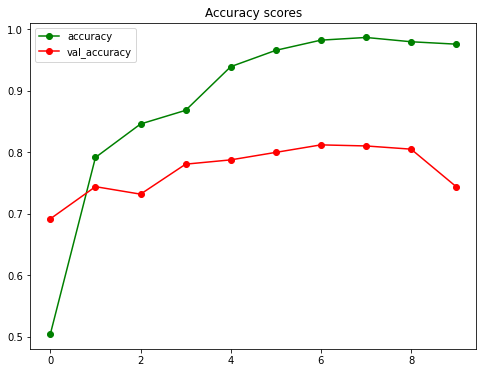

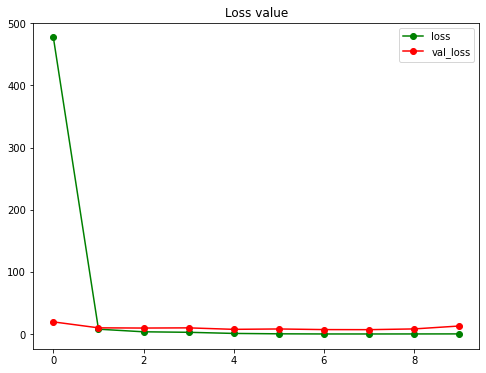

In [27]:
plt.figure(figsize=(8,6))
plt.title('Accuracy scores')
plt.plot(history.history['accuracy'],'go-')
plt.plot(history.history['val_accuracy'],'ro-')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()
plt.figure(figsize=(8,6))
plt.title('Loss value')
plt.plot(history.history['loss'],'go-')
plt.plot(history.history['val_loss'],'ro-')
plt.legend(['loss', 'val_loss'])
plt.show()

In [14]:
model.save('../models/modelsequential2.h5')

In [ ]:
#This worked so i will leave there too

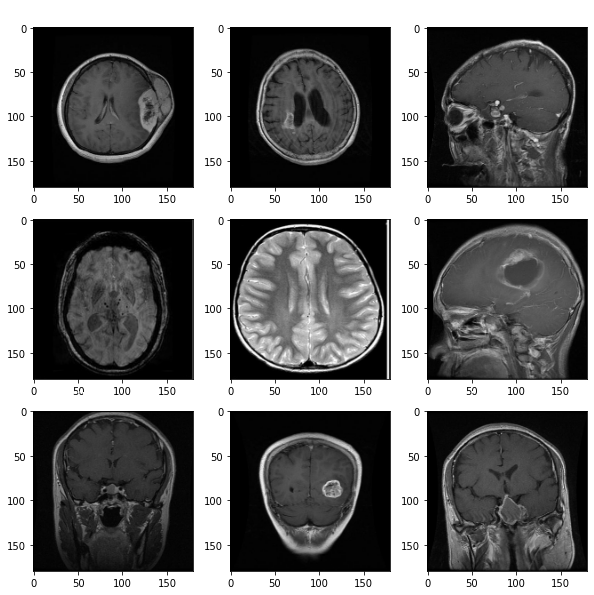

In [9]:
classes = train_data.class_names
plt.figure(figsize = (10,10))
for img,label in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(classes[label[i]],
                  fontdict = {'fontsize': '19',
                              'color': 'white'}
                 )

In [ ]:
b. What can you conclude about your data study?




In [ ]:
c. What would you change if you needed to do another DS project?



In [ ]:
d. What do you learn doing this project?

